In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 438 kB 51.2 MB/s 
     |████████████████████████████████| 5.9 MB 38.5 MB/s 
     |████████████████████████████████| 1.7 MB 58.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.2


In [4]:
# importing some basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [6]:
df.head()
# to predict who exit the company / bank in future or not 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Divide the dataset into independent and dependent features
x= df.iloc[:,3:13]
y= df.iloc[:,13]

In [8]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
## Feature Engineering 
geography = pd.get_dummies(x['Geography'],drop_first=True)
geography
# Drop_First is used so that two column will be displayed here 

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
gender = pd.get_dummies(x['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
# concateate these variable with dataframe
x= x.drop(['Gender','Geography'],axis=1)

In [13]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
x=pd.concat([x,geography,gender],axis=1)

In [15]:
# splitting the dataset into training set and test set 
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
# Feature scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# ANN can also be solved with Machine learning 

In [19]:
# lets create ANN 
# Tensorflow - Google 
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [21]:
classifier = Sequential()

In [22]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [23]:
# Adding the first hidden layer 
classifier.add(Dense(units=7,activation='relu'))

In [24]:
# Adding the second hidden layer 
classifier.add(Dense(units=6,activation='relu'))

In [25]:
# Adding the output layer 
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
#Compile the entire neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [28]:
## Early stopping 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose= 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [29]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 10s 8ms/step - loss: 0.4703 - accuracy: 0.7949 - val_loss: 0.4291 - val_accuracy: 0.8020
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4250 - accuracy: 0.8097 - val_loss: 0.4175 - val_accuracy: 0.8164
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4100 - accuracy: 0.8220 - val_loss: 0.3972 - val_accuracy: 0.8201
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3985 - accuracy: 0.8281 - val_loss: 0.3880 - val_accuracy: 0.8304
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3887 - accuracy: 0.8349 - val_loss: 0.3790 - val_accuracy: 0.8379
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3805 - accuracy: 0.8414 - val_loss: 0.3722 - val_accuracy: 0.8421
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3737 - accuracy: 0.8425 - val_loss: 0.3675 - val_accuracy

In [30]:
# The epoch will stop based on the training we fed in the early stopping 
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

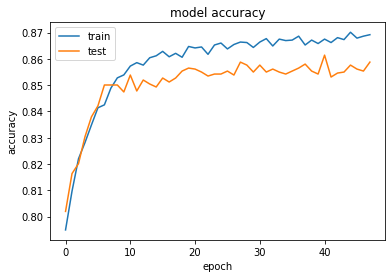

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

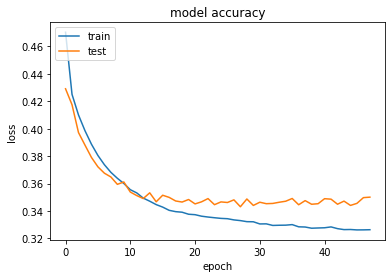

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
# prediction for test data 
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [34]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1513,   72],
       [ 205,  210]])

In [35]:
# calculate the accuracy

In [37]:
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_pred,y_test)

In [38]:
score 

0.8615

In [39]:
# get the weights 
classifier.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7f2aeebea410>>